#Titanic Survivor's Classification - Kaggle Competition
_**Problem Statement:**  To predict if a passenger survived the sinking of the Titanic or not._<br/>
_**Competition Link:**  https://www.kaggle.com/c/titanic_<br/><br/>

_**Solution by:**  Anuj Vyas._<br/>
_**GitHub Profile:**  https://github.com/anujvyas_<br/>
_**Kaggle Profile:**  https://www.kaggle.com/anujvyas_<br/>

In [62]:
'''

Project Planning - Overview of how I tried to attempt this problem statement

--- Exploratory Data Analysis (EDA) ---
  Understand nature of the data .info(), .describe()
  Plot Histograms and boxplots for numeric data
  Plot Value counts for categorical data

  - Find answers to these questions:
    Q. Did wealthy(paying high fares)/class of people affects the survival? 
    Q. Does age, sex and location have any impact on survival?
    Q. Does different cabin locations affects the survival?
    Q. Does sibling/spouse, parent/children have any effect on survival?
    
--- Feature Engineering ---
  Create a new feature name_title from Name feature
  Create a new feature cabin_initial from Cabin feature
  Create a new feature from Ticket

--- Feature Selection ---
  Find correlation between features
  Removing features having very high correlation eg. corr > 0.8

--- Data Preprocessing ---
  - Data Cleaning:
    Removing unwanted columns eg. PassengerId, Name, Ticket
    Handling missing data

  - Feature Scaling:
    Is feature scaling required/necessary?
    Which scaling technique to be used?

--- Model Building ---
  Which algorithms to select?

'''

'\n\nProject Planning - Overview of how I tried to attempt this problem statement\n\n--- Exploratory Data Analysis (EDA) ---\n  Understand nature of the data .info(), .describe()\n  Plot Histograms and boxplots for numeric data\n  Plot Value counts for categorical data\n\n  - Find answers to these questions:\n    Q. Did wealthy(paying high fares)/class of people affects the survival? \n    Q. Does age, sex and location have any impact on survival?\n    Q. Does different cabin locations affects the survival?\n    Q. Does sibling/spouse, parent/children have any effect on survival?\n    \n--- Feature Engineering ---\n  Create a new feature name_title from Name feature\n  Create a new feature cabin_initial from Cabin feature\n  Create a new feature from Ticket\n\n--- Feature Selection ---\n  Find correlation between features\n  Removing features having very high correlation eg. corr > 0.8\n\n--- Data Preprocessing ---\n  - Data Cleaning:\n    Removing unwanted columns eg. PassengerId, Nam

In [63]:
# Importing essential libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [64]:
# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis
*   Finding statistical information for numeric feature(s)
*   Observing the distribution of data for numeric & categorical feature(s)
*   Finding # of features having NaN/missing values

In [65]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
test.head(n=5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Dictionary:**<br/>
*   Survived: Did the passenger survive, 0 = No, 1 = Yes. _**(Dependent Variable)**_<br/>
*   Pclass:  Ticket class - 1 = Upper Class, 2 = Middle Class, 3 = Lower Class<br/>
*   SibSp: # of siblings / spouses aboard the Titanic.<br/>
*   Parch: # of parents / children aboard the Titanic.<br/>
*   Ticket: Ticket number.<br/>
*   Cabin: Cabin number.<br/>
*   Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.<br/>

In [67]:
train.shape

(891, 12)

In [68]:
test.shape

(418, 11)

In [69]:
# Merging both train and test dataset for EDA
train['test_data'] = 0
test['test_data'] = 1
test['Survived'] = np.NaN

df = pd.concat(objs=[train, test])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  test_data    1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [71]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test_data         0
dtype: int64

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
test_data,1309.0,0.319328,0.466394,0.00,0.0000,0.0000,1.000,1.0000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


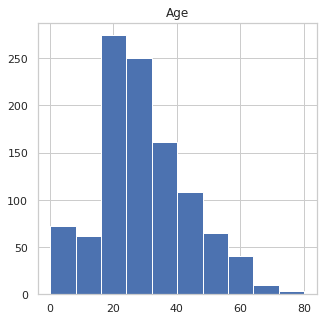

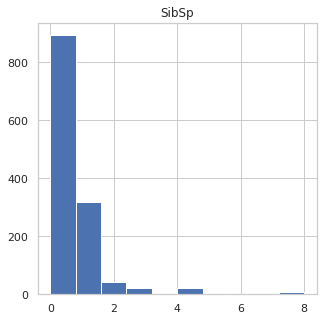

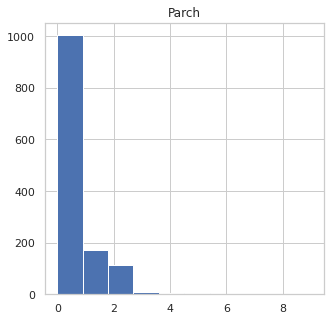

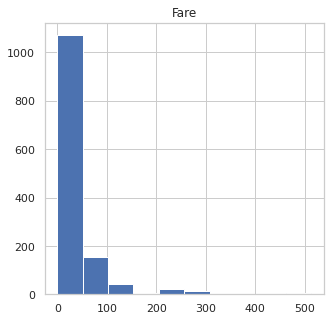

In [73]:
# Plotting histograms for numeric features to understand distributions
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']
for column in numeric_columns:
  plt.figure(figsize=(5,5))
  plt.hist(df[column])
  plt.title(column)
  plt.show()

_**Insight:** Only Age feature follows standard normal distribution._

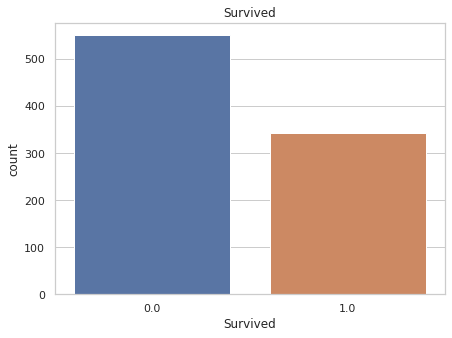

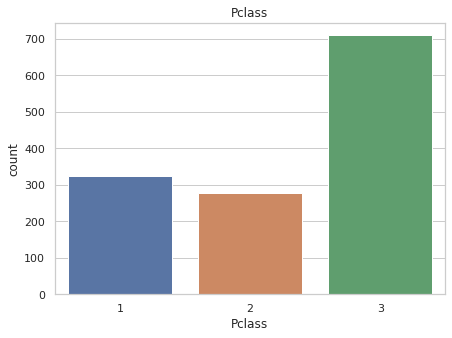

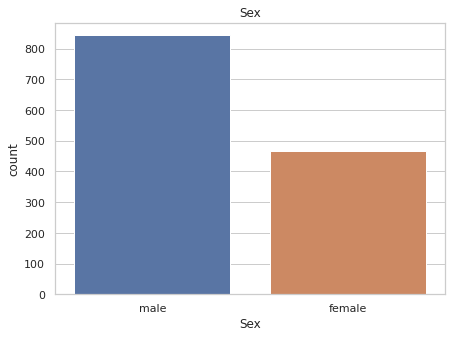

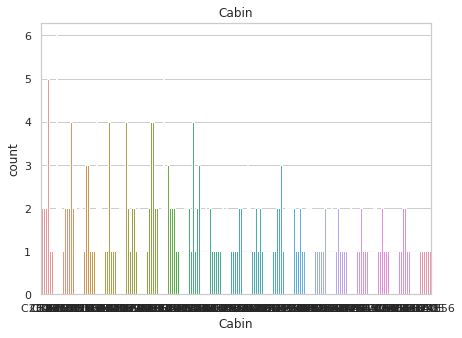

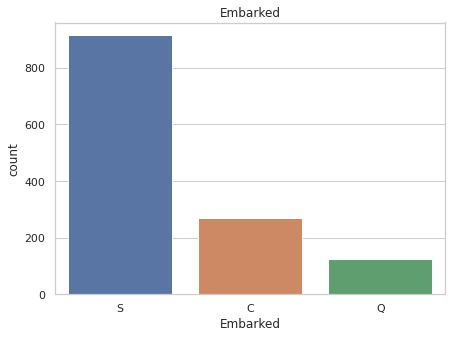

In [74]:
# Plotting countplots for categorical features
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']
for column in categorical_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[column])
  plt.title(column)
  plt.show()

In [75]:
# How Titanic ship sank?
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1000w")

In [76]:
def bar_chart(feature):
  survived = df[(df.test_data == 0) & (df['Survived'] == 1)][feature].value_counts()
  dead = df[(df.test_data == 0) & (df['Survived'] == 0)][feature].value_counts()
  temp_df = pd.DataFrame([survived,dead])
  temp_df.index = ['Survived','Dead']
  temp_df.plot(kind='bar', stacked=True, figsize=(10,5))

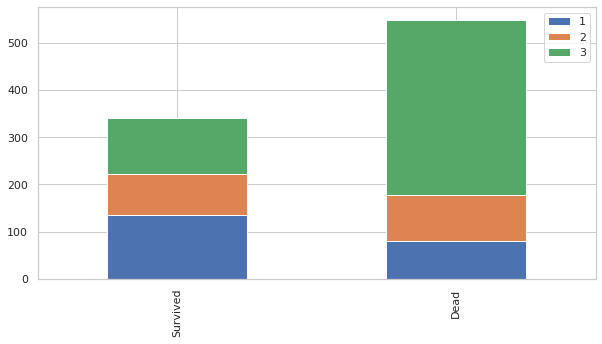

In [77]:
bar_chart('Pclass')

_**Insight:** Above chart confirms that people from **1st Class have survived more** and people from **3rd Class have died the most.**_

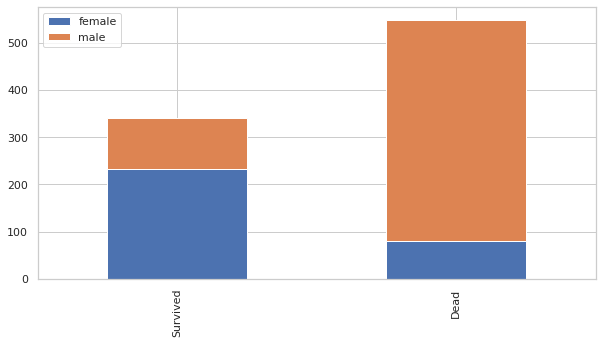

In [78]:
bar_chart('Sex')

_**Insight:** Above chart confirms that **Women have survived more** as compared men, and **Men have died more** than women._

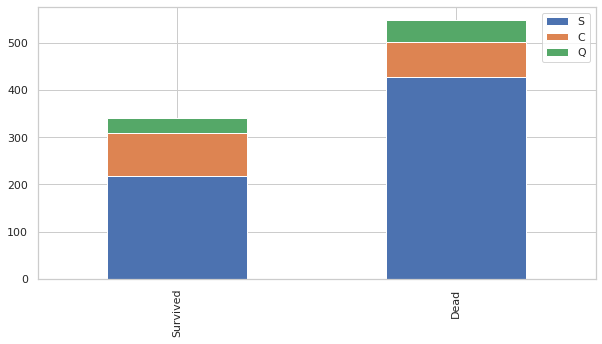

In [79]:
bar_chart('Embarked')

_**Insight:** Above chart confirms that **people from Southampton and Queenstown have died more**, and **people from Cherbourg have approx. 50% chance of survival**._

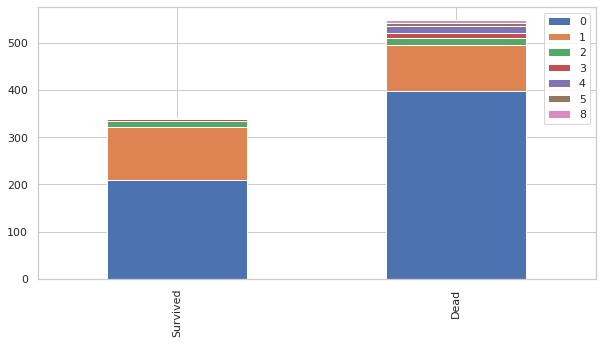

In [80]:
bar_chart('SibSp')

_**Insight:** Above chart confirms that people with **No Siblings / Spouse are more likely to die**, people with **1 Siblings / Spouse** have **equal chances of survival and death**, and people with **2 or more Siblings / Spouse are more likely to die**._

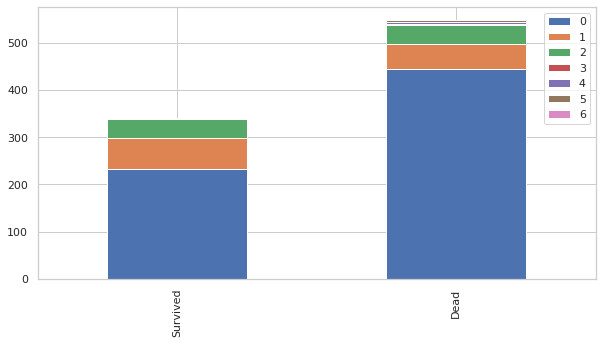

In [81]:
bar_chart('Parch')

_**Insight:** Above chart confirms that people with **No Parents / Childrens are more likely to die**, people with **1 or 2 Parents / Childrens** have **equal chances of survival and death**, and people with **3 or more Parents / Childrens are more likely to die**._

## Feature Engineering

In [82]:
# Creating a new column of 'name_title' from 'Name' feature
# Sample name: Braund, Mr. Owen Harris
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Don               1
Lady              1
Capt              1
the Countess      1
Sir               1
Mme               1
Dona              1
Name: name_title, dtype: int64

_**Note:** Keeping the top 4 titles and converting rest to another category of 'Other'._

In [83]:
most_frequent_titles = ['Mr', 'Miss', 'Mrs', 'Master'] 
df['name_title'] = df['name_title'].apply(lambda x: x if x in most_frequent_titles else 'Other')
df['name_title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: name_title, dtype: int64

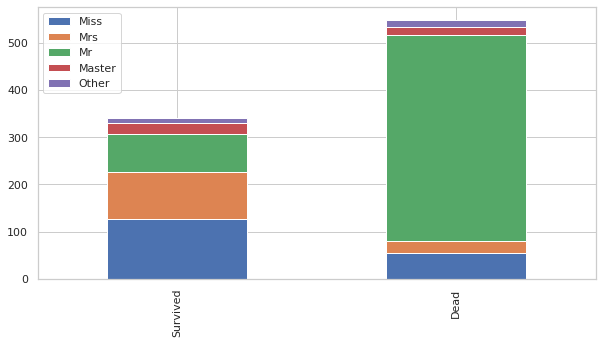

In [84]:
bar_chart('name_title')

_**Insight:** Above chart confirms that people having **Miss and Mrs titles have high chance of survival**, people having **Mr title have high chance of dying**, and people having **Master and Other titles have approx. 50% probability of suvival.**_

In [85]:
# Creating a new column of 'cabin_init' from 'Cabin' feature assuming same initials are clustered togeather
# Sample Cabin: C23
df['cabin_init'] = df['Cabin'].apply(lambda x: str(x)[0])
df['cabin_init'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_init, dtype: int64

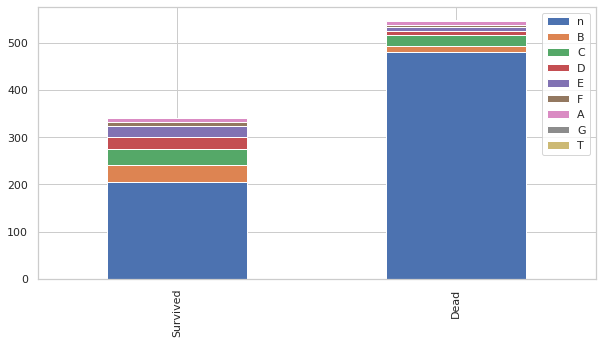

In [86]:
bar_chart('cabin_init')

_**Insight:** Above chart confirms that people from **Unknown cabins(missing values) have high chance of dying**, and people from **B, C, D, and E cabins have high chance of surviving**._

In [87]:
# Creating a new column of 'ticket_numeric' from 'Ticket' feature
# Sample Ticket: 112053 and PC 17603
df['ticket_numeric'] = df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_numeric'].value_counts()

1    957
0    352
Name: ticket_numeric, dtype: int64

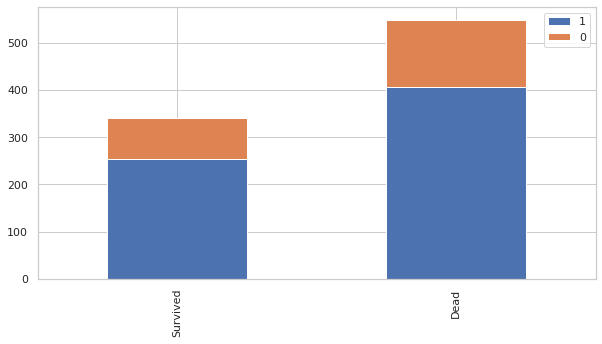

In [88]:
bar_chart('ticket_numeric')

_**Insight:** Not much useful insight generated._

## Data Preprocessing

*   **Data Cleaning**
*   Handling categorical features
*   **Feature Selection**
*   Splitting the dataset into train set and validation set
*   **Feature Scaling**



### Data Cleaning
*   Removing unwanted features/columns<br/>
*   Handling missing/NaN values<br/>



In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_data',
       'name_title', 'cabin_init', 'ticket_numeric'],
      dtype='object')

In [90]:
# Removing column(s) that don't provide any significant insights
print("Before removing the unwanted columns: {}".format(df.shape))
df.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
print("After removing the unwanted columns: {}".format(df.shape))

Before removing the unwanted columns: (1309, 16)
After removing the unwanted columns: (1309, 12)


In [91]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Fare                1
Embarked            2
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

_**Note:** For 'Age' feature/column, we need to visualize it's distribution and find out if the outliers are present in the feature or not. If yes, then it is better to go with the **median** as it reduces the effect of outlier. If no, then **mean** can be considered._




/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram for Age feature')

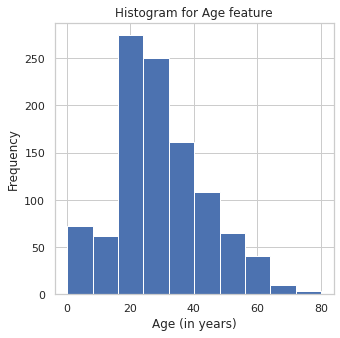

In [92]:
# Plotting histogram for 'Age'
plt.figure(figsize=(5,5))
plt.hist(x=df['Age'], bins=10, histtype='bar', orientation='vertical')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.title('Histogram for Age feature')

Text(0.5, 1.0, 'Histogram for Age feature')

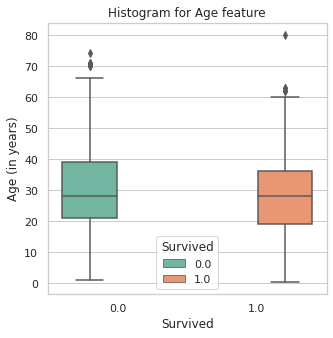

In [93]:
# Plotting boxplot for 'Age'
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette='Set2')
plt.ylabel('Age (in years)')
plt.title('Histogram for Age feature')

In [94]:
# Replacing the NaN values by median of the 'Age'
print('Number of NaN values before: {}'.format(df['Age'].isnull().sum()))
df['Age'].fillna(df['Age'].median(), inplace=True)
print('Number of NaN values after: {}'.format(df['Age'].isnull().sum()))

Number of NaN values before: 263
Number of NaN values after: 0


_**Note:** For 'Embarked' feature/column, since it is a **categorical feature** there are following techniques to fill NaN/missing values, and they are as follows:_
1.   Deleting the NaN/missing rows
2.   Replace NaN with most frequent value
3.   Apply classifying algorithm for predicting the values
4.   Apply unsupervised machine learning algorithms like: K-Means, Hierarchical clustering











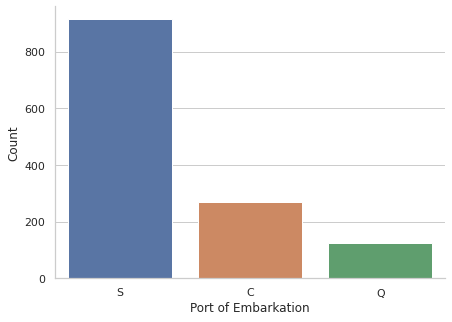

In [95]:
# Plotting countplot for Embarked column
plt.figure(figsize=(7,5))
sns.countplot(x='Embarked', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [96]:
# Using method 2: Replace NaN with most frequent value
print('Number of NaN values before: {}'.format(df['Embarked'].isnull().sum()))
df['Embarked'].fillna('S', inplace=True)
print('Number of NaN values after: {}'.format(df['Embarked'].isnull().sum()))

Number of NaN values before: 2
Number of NaN values after: 0


Text(0.5, 1.0, 'Histogram for Fare feature')

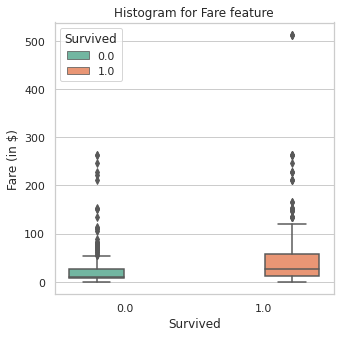

In [97]:
# Plotting boxplot for 'Fare'
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df, palette='Set2')
plt.ylabel('Fare (in $)')
plt.title('Histogram for Fare feature')

In [98]:
# Using meadian to replace NaN value in 'Fare' feature
print('Number of NaN values before: {}'.format(df['Fare'].isnull().sum()))
df['Fare'].fillna(df['Fare'].median(), inplace=True)
print('Number of NaN values after: {}'.format(df['Fare'].isnull().sum()))

Number of NaN values before: 1
Number of NaN values after: 0


In [99]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [100]:
df.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,n,1


In [101]:
# Converting Sex feature from categorical to a binary feature
print('Datatype of Sex feature before: {}'.format(df['Sex'].dtype))
df['Sex'] = df['Sex'].apply(lambda x: 1 if (x=='male') else 0)
print('Datatype of Sex feature after: {}'.format(df['Sex'].dtype))
print('---------------------------------------------')
print('Column name before: {}'.format(df.columns[2]))
df.rename(mapper={'Sex':'Sex_male'}, axis=1, inplace=True)
print('Column name after: {}'.format(df.columns[2]))

Datatype of Sex feature before: object
Datatype of Sex feature after: int64
---------------------------------------------
Column name before: Sex
Column name after: Sex_male


In [102]:
# Converting Embarked column using get_dummies()
print('Shape of df before: {}'.format(df.shape))
df = pd.get_dummies(data=df, columns=['Embarked', 'name_title', 'cabin_init'], drop_first=True)
print('Shape of df after: {}'.format(df.shape))

Shape of df before: (1309, 12)
Shape of df after: (1309, 23)


### Feature Selection



In [103]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
temp_X_train = df[df['test_data']==0].drop(['Survived'], axis=1)
temp_y_train = df[df['test_data']==0]['Survived']
etc = ExtraTreesClassifier()
etc.fit(temp_X_train, temp_y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

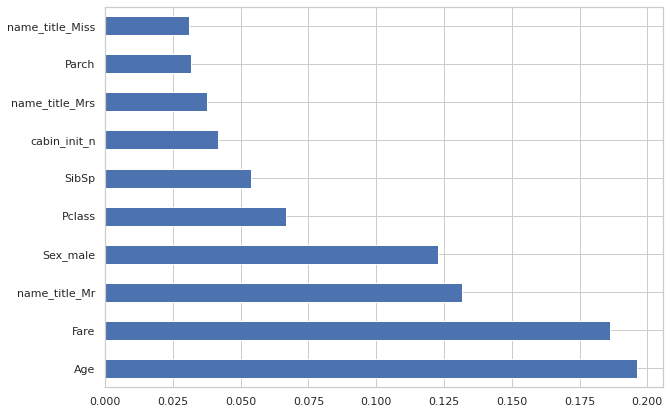

In [104]:
plt.figure(figsize=(10,7))
feature_score = pd.Series(etc.feature_importances_, index=temp_X_train.columns)
feature_score.nlargest(10).plot(kind='barh')
plt.show()

In [105]:
feature_score.nlargest(10).index

Index(['Age', 'Fare', 'name_title_Mr', 'Sex_male', 'Pclass', 'SibSp',
       'cabin_init_n', 'name_title_Mrs', 'Parch', 'name_title_Miss'],
      dtype='object')

In [106]:
# Selecting top 10 features
df_important_features = df[['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
                            'cabin_init_n', 'Parch', 'name_title_Mrs', 'name_title_Miss', 'Survived', 'test_data']]

In [107]:
df_important_features.columns

Index(['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
       'cabin_init_n', 'Parch', 'name_title_Mrs', 'name_title_Miss',
       'Survived', 'test_data'],
      dtype='object')

### Feature Scaling

In [108]:
# Splitting the dataset into train set and test set
X_train = df_important_features[df_important_features['test_data']==0].drop(['Survived'], axis=1)
X_train.drop(['test_data'], axis=1, inplace=True)
y_train = df_important_features[df_important_features['test_data']==0]['Survived']
X_test = df_important_features[df_important_features['test_data']==1].drop(['Survived'], axis=1)
X_test.drop(['test_data'], axis=1, inplace=True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (891, 10), X_test size: (418, 10)


In [109]:
# Feature Scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Model Building
*   K-Nearest Neighbours - _Accuracy: 81.8202%_
*   Logistic Regression - _Accuracy: 81.8165%_
*   **Support Vector Machine - _Accuracy: 82.829%_**
*   Decision Tree - _Accuracy: 78.9064%_
*   Random Forest - _Accuracy: 81.7166%_
*   **Extreme Gradient Boosting (XGBoost) _(Ensemble) - Accuracy: 83.0562%_**
*   **Voting _(Ensemble) - Accuracy: 83.7291%_**

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.8202% ---
Scores for each cycle: [0.8        0.85393258 0.75280899 0.79775281 0.83146067 0.82022472
 0.83146067 0.79775281 0.85393258 0.84269663]


In [112]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.8165% ---
Scores for each cycle: [0.83333333 0.82022472 0.75280899 0.85393258 0.82022472 0.76404494
 0.84269663 0.82022472 0.83146067 0.84269663]


In [113]:
# Fitting Support Vector Machine to the Training set
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 82.829% ---
Scores for each cycle: [0.82222222 0.87640449 0.76404494 0.87640449 0.84269663 0.7752809
 0.82022472 0.79775281 0.85393258 0.85393258]


In [114]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 78.9064% ---
Scores for each cycle: [0.73333333 0.79775281 0.66292135 0.75280899 0.86516854 0.84269663
 0.78651685 0.76404494 0.85393258 0.83146067]


In [115]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.7166% ---
Scores for each cycle: [0.72222222 0.84269663 0.71910112 0.85393258 0.84269663 0.87640449
 0.79775281 0.78651685 0.87640449 0.85393258]


In [116]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 83.0562% ---
Scores for each cycle: [0.8        0.80898876 0.76404494 0.85393258 0.88764045 0.82022472
 0.84269663 0.83146067 0.86516854 0.83146067]


In [117]:
# Fitting VotingClassifier to the Training set
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators = [('xgb',xgb), ('svc',svc), ('lr',lr), ('knn',knn), ('rf',rf)], voting = 'soft') 
cv = cross_val_score(vt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 83.7291% ---
Scores for each cycle: [0.81111111 0.88764045 0.76404494 0.86516854 0.84269663 0.83146067
 0.83146067 0.80898876 0.86516854 0.86516854]


## Submission

In [121]:
# VotingClassifier
vt = VotingClassifier(estimators = [('xgb',xgb), ('svc',svc), ('lr',lr), ('knn',knn), ('rf',rf)], voting = 'soft') 
vt.fit(X_train_scaled, y_train)

prediction = vt.predict(X_test_scaled)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction.astype(int)
    })

submission.to_csv('vt_submission.csv', index=False)

_**Reference(s):**_<br/>
This notebook is created by learning from the following notebooks:<br/>
*   _Titanic Project Example by **Kenneth Jee:** https://www.kaggle.com/kenjee/titanic-project-example_
*   _Titanic - Machine Learning from Disaster by **Minsuk Heo:** https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb_